In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from glob import glob

In [3]:
path='/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers'
image=glob(path+'/*')
image

['/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/sunflower',
 '/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/tulip',
 '/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/dandelion',
 '/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/rose',
 '/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/daisy']

In [4]:
tulip_list=list(glob(path+'/tulip/*'))[0:100]
rose_list=list(glob(path+'/rose/*'))[0:100]
dandelion_list=list(glob(path+'/dandelion/*'))[0:100]
daisy_list=list(glob(path+'/daisy/*'))[0:100]
sunflower_list=list(glob(path+'/sunflower/*'))[0:100]

In [5]:
input_map={'tulip':tulip_list,'rose':rose_list,'dandelion':dandelion_list,'daisy':daisy_list,'sunflower':sunflower_list}

In [6]:
output={'tulip':0,'rose':1,'dandelion':2,'daisy':3,'sunflower':4}

In [7]:
tulip_list[0]

'/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/tulip/9378657435_89fabf13c9_n.jpg'

In [8]:
#preprocessing

In [9]:
x=[]
y=[]
import cv2
import numpy as np
for i in input_map:
  #print(i)
  path_list=input_map[i]
  #print(path_list)
  for j in path_list:
    #print(j)
    img_array=cv2.imread(j)
    #print(img_array)
    img_array=cv2.resize(img_array,(224,224))#resizing image
    image_array=img_array/255 #converting to 0-1
    #print(img_array_)
    img_array=img_array.reshape(224,224,3,1) #reshapeing dimentionality
    x.append(img_array)
    y.append(output[i])

In [10]:
#converting list to array
x=np.array(x)
y=np.array(y)

In [11]:
type(x)

numpy.ndarray

In [12]:
x.shape

(500, 224, 224, 3, 1)

In [13]:
y.shape

(500,)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [15]:
from tensorflow.keras.layers import Conv3D,MaxPool3D,Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [16]:
model=Sequential()
model.add(Conv3D(filters=10,kernel_size=(2,2,3),input_shape=(224,224,3,1)))
model.add(MaxPool3D(pool_size=(2,2,1)))
model.add(Conv3D(filters=15,kernel_size=(2,2,1),activation='relu'))
model.add(MaxPool3D(pool_size=(2,2,1)))
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=5,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 223, 223, 1, 10)   130       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 111, 111, 1, 10)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 110, 110, 1, 15)   615       
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 55, 55, 1, 15)    0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 45375)             0         
                                                                 
 dense (Dense)               (None, 100)               4

In [18]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [19]:
model.fit(xtrain,ytrain,batch_size=250,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
2/2 [==============================] - 60s 22s/step - loss: 887.7707 - accuracy: 0.1950 - val_loss: 742.8125 - val_accuracy: 0.3400
Epoch 2/5
2/2 [==============================] - 55s 22s/step - loss: 1238.1207 - accuracy: 0.2775 - val_loss: 1248.5782 - val_accuracy: 0.2200
Epoch 3/5
2/2 [==============================] - 55s 22s/step - loss: 1285.9070 - accuracy: 0.1950 - val_loss: 439.9203 - val_accuracy: 0.2400
Epoch 4/5
2/2 [==============================] - 54s 22s/step - loss: 488.0591 - accuracy: 0.2775 - val_loss: 324.2650 - val_accuracy: 0.3900
Epoch 5/5
2/2 [==============================] - 55s 22s/step - loss: 367.5582 - accuracy: 0.3125 - val_loss: 270.1255 - val_accuracy: 0.3100


In [20]:
from PIL import Image
from matplotlib.pyplot import imshow

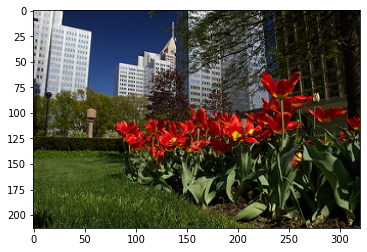

In [21]:
img=Image.open('/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/tulip/9378657435_89fabf13c9_n.jpg')
imshow(img)

In [35]:
i_array=cv2.imread('/content/drive/MyDrive/flowers-20221205T034158Z-001/flowers/tulip/9378657435_89fabf13c9_n.jpg')
dataset=[]
i_array=cv2.resize(i_array,(224,224))
#i_array.shape
np.max(i_array)
i_array=i_array/255
i_array=i_array.reshape(224,224,3,1)
dataset.append(i_array)
test=np.array(dataset)
test.shape
result=model.predict(test)
res=np.argmax(result)
print(res)

1/1 [==============================] - 0s 51ms/step
4
